# Gaussian Receptive Fields

## Description
Temporal Encoding of continous input data. 

## Reference Papers
Wang, J., Belatreche, A., Maguire, L., & Mcginnity, T. M. (2014). **An online supervised learning method for spiking neural networks with adaptive structure**. Neurocomputing, 144, 526-536.

S.M. Bohte, H.L. Poutre , J.N. Kok, **Unsupervised clustering with spiking neurons by sparse temporal coding and multi-layer RBF networks**, in:Proceedings of the IEEE-INNS-ENNS International Joint Conference on Neural Networks, 2000, pp. 279–284.

### Contributor
Ajinkya Indulkar

In [1]:
# import libraries
import warnings
warnings.filterwarnings(action='ignore')

import scipy.stats
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

## Part 1: Experimentation

Load IRIS Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Create a vector (evenly spaced) for computing gaussian receptive fields. Increase granularity of this vector for smoother GRFs and spike time computation accuracy.

In [3]:
# grf input array
inp = np.around(np.arange(0, 10, 0.1), decimals=1)
inp_min = min(inp)
inp_max = max(inp)

Define number of neurons ($n$) required for the temporal encoding of input data. 

Compute sigma ($\sigma$) using the formula:

$\sigma = \frac{1}{\gamma}.\frac{\{I^i_{max} - I^i_{min}\}}{n - 2}$ ,where $i$ is input variable (sample), $\gamma$ works best with a value of **1.5** and $n > 0$

In [4]:
n = 20 # define number of neurons
sigma = (1/1.5) * (inp_max-inp_min)/(n-2) # compute standard deviation
sigma = round(sigma, 2) # round sigma to 2 decimal points

#### Compute Gaussian Receptive Fields

Compute Center of Gaussian ($\mu$) using the equation:

$\mu = I^n_{min} + \frac{2i - 3}{2}.\frac{\{I^i_{max} - I^i_{min}\}}{n - 2}$

In [5]:
# compute gaussian centers
mu = inp_min +  ((np.arange(0, n, 1) - 1.5) * (inp_max - inp_min) / (n-2))
mu

array([-0.825, -0.275,  0.275,  0.825,  1.375,  1.925,  2.475,  3.025,
        3.575,  4.125,  4.675,  5.225,  5.775,  6.325,  6.875,  7.425,
        7.975,  8.525,  9.075,  9.625])

Compute and Plot GRF for *inp* vector. Normalize it as the PDF returns a few values above 1.

In [6]:
# compute gaussian receptive fields
grf = np.array([scipy.stats.norm(mu[i], sigma).pdf(inp) for i in range(n)])
grf = preprocessing.normalize(grf, axis=0)

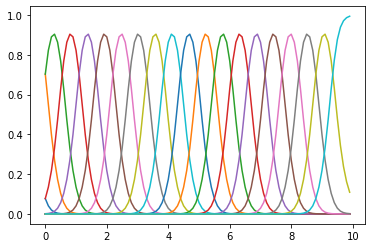

In [7]:
for i in range(n):
    plt.plot(inp, grf[i])

Compute Spike Timings

In [8]:
T_ref = 10 # Reference time for temporal encoding
spike_times = []
for i in range(len(X)):
    indices = np.where(np.in1d(inp, X[i]))[0] # extracts location of the elements of X[i] in inp array.
    spike_times_ps = [] # spike times per sample
    for idx in indices:
        grf_values = [-T_ref*g[idx]+T_ref for g in grf]
        spike_times_ps.append([-1 if g>=T_ref-1 else g for g in grf_values])
    spike_times_ps = np.around(np.array(spike_times_ps), decimals=2)
    spike_times.append(spike_times_ps)
    
spike_times = np.array(spike_times)

In [9]:
spike_times.shape

(150, 4, 20)

In [10]:
spike_times[0]

array([[-1.  ,  6.01,  1.1 ,  7.82, -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ],
       [-1.  , -1.  , -1.  ,  7.29,  0.96,  6.69, -1.  , -1.  , -1.  ,
        -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,  6.01,  1.1 ,
         7.82, -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  ,  5.27,  1.36,  8.27, -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  ]])

Observe Spike Times of the first sample

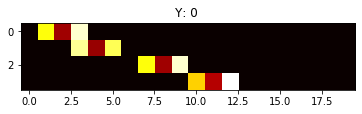

In [11]:
plt.imshow(spike_times[0], cmap='hot', interpolation='nearest')
plt.title("Y: {} ".format(y[0]))
plt.show()

Observe Spike Times for all samples

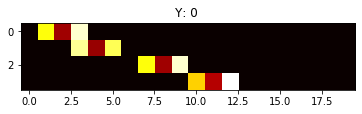

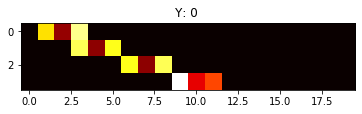

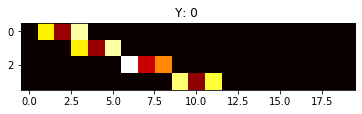

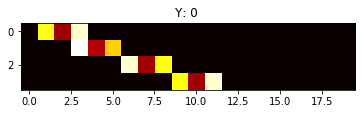

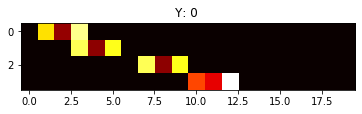

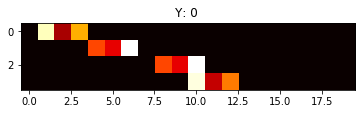

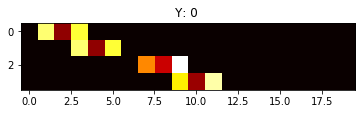

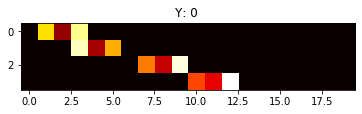

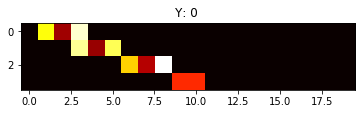

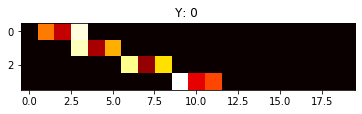

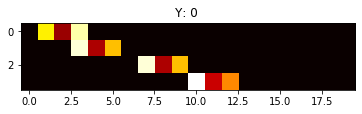

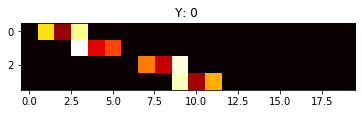

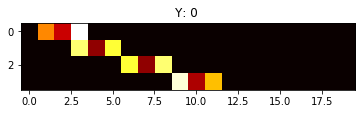

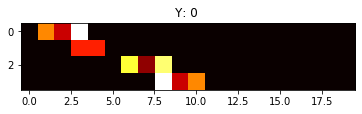

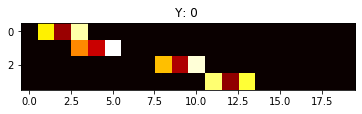

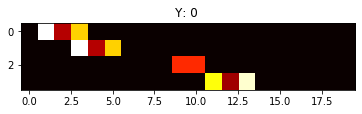

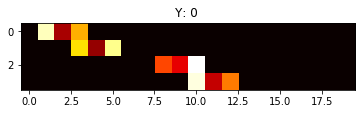

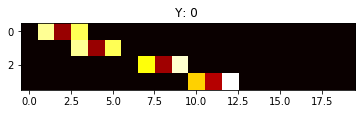

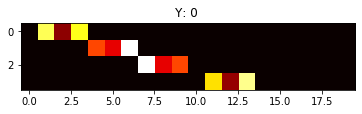

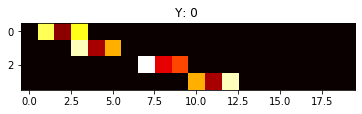

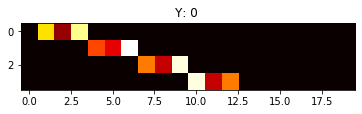

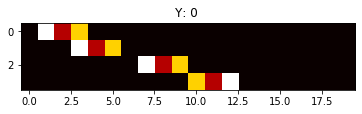

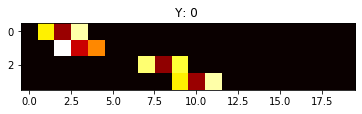

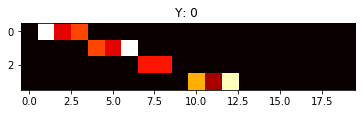

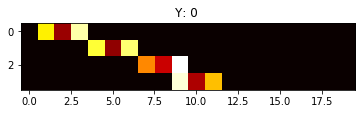

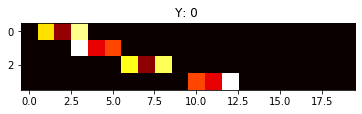

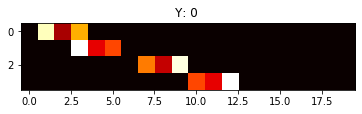

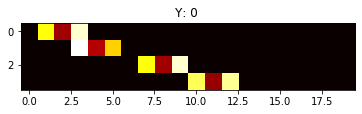

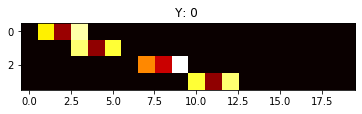

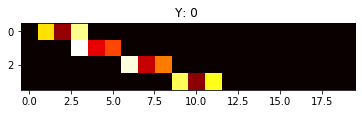

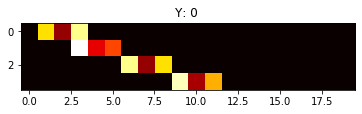

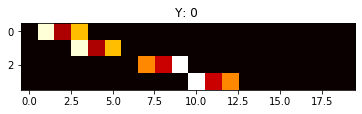

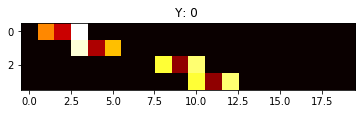

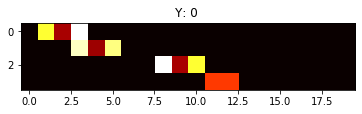

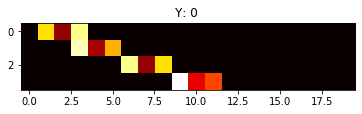

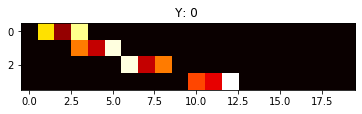

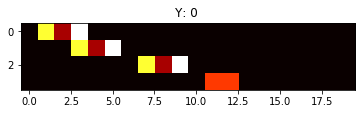

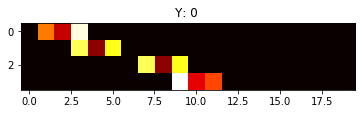

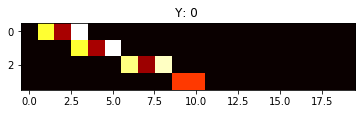

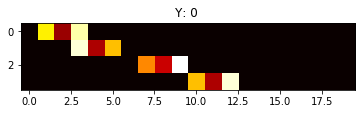

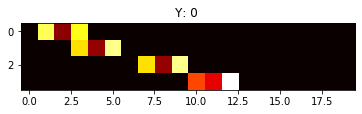

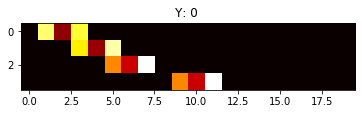

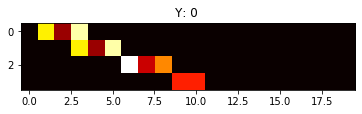

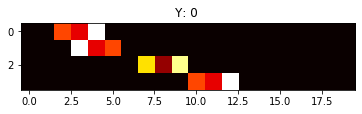

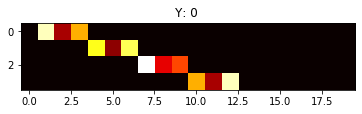

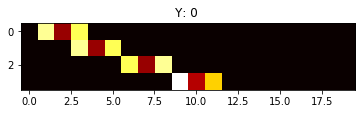

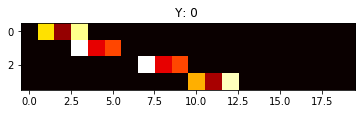

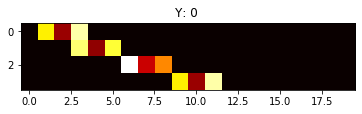

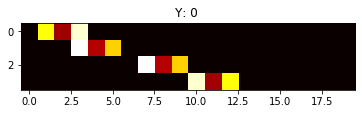

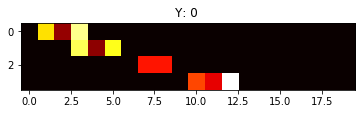

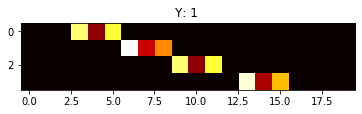

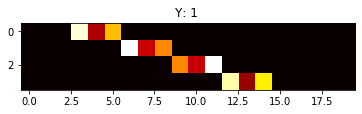

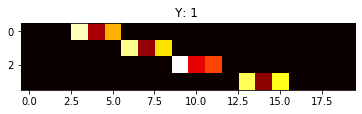

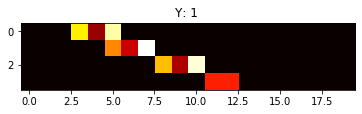

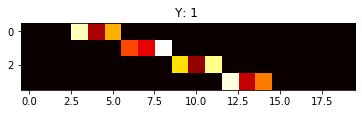

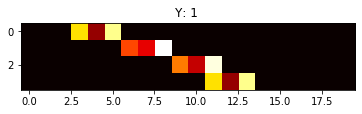

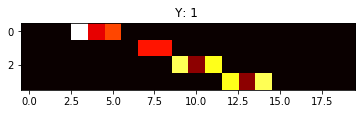

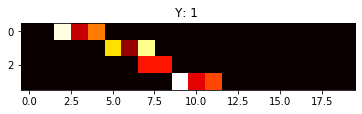

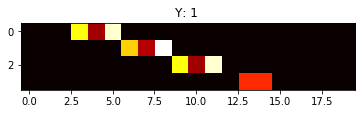

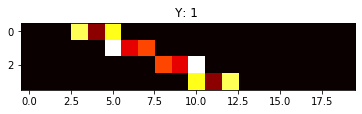

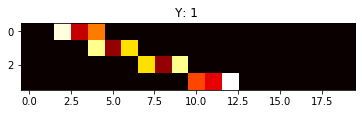

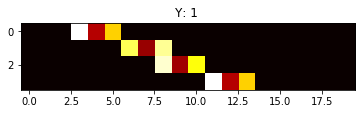

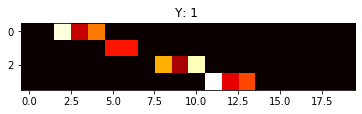

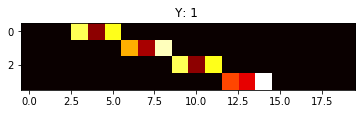

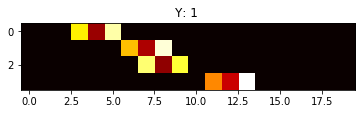

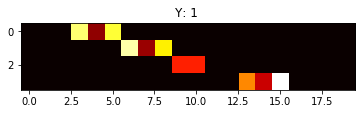

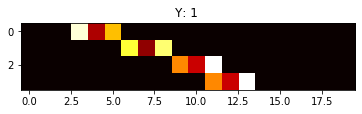

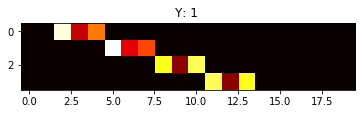

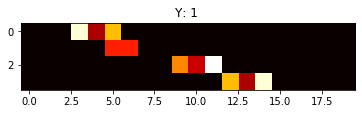

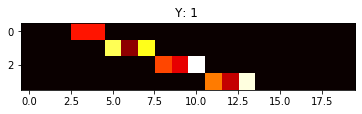

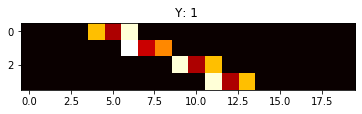

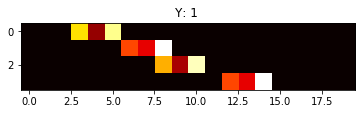

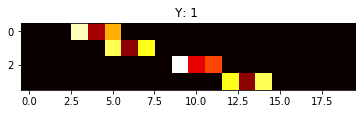

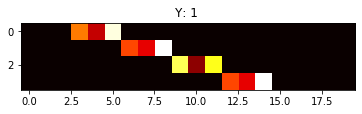

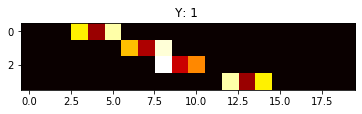

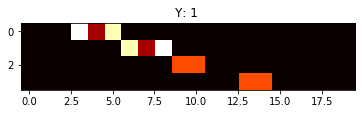

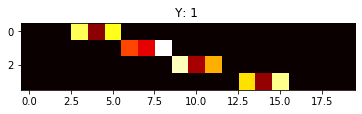

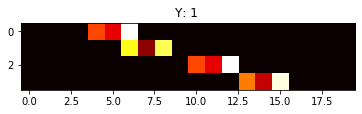

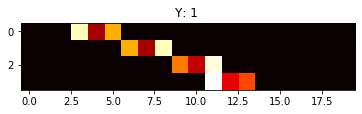

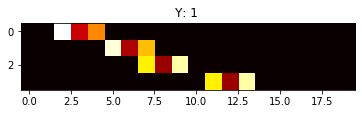

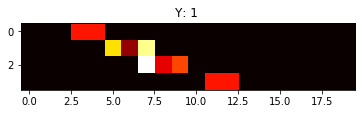

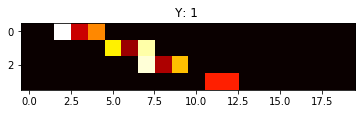

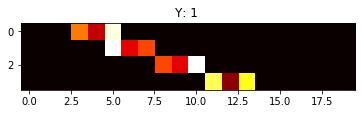

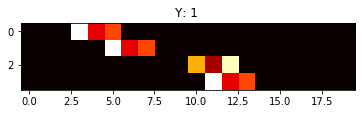

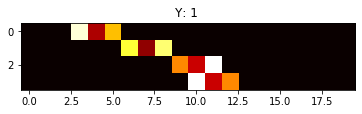

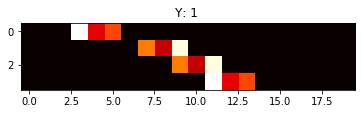

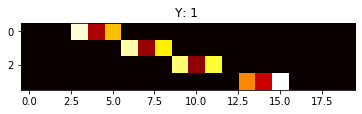

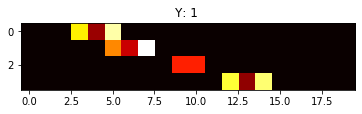

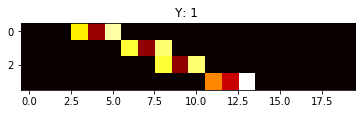

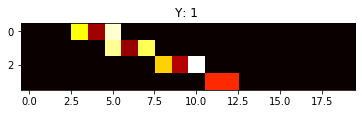

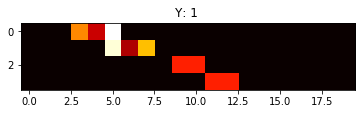

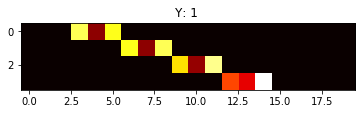

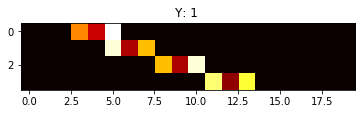

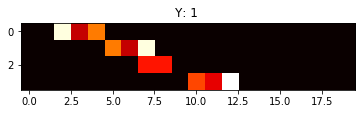

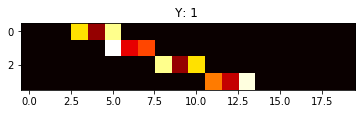

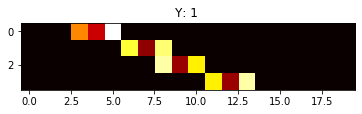

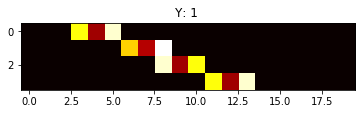

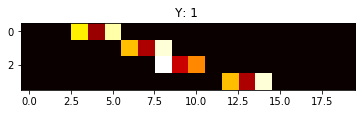

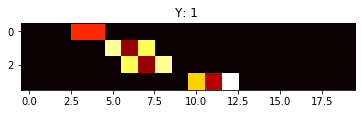

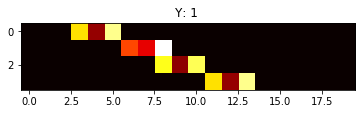

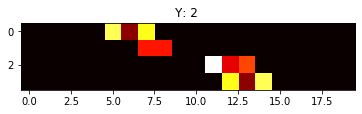

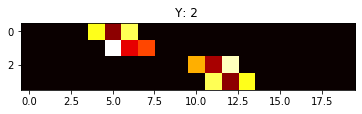

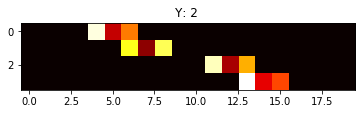

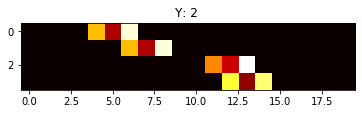

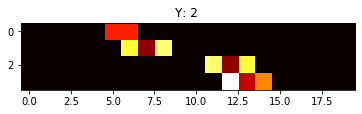

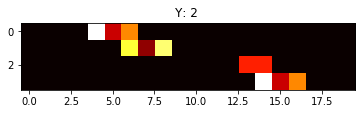

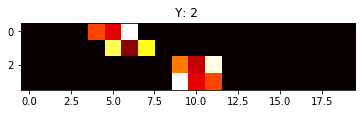

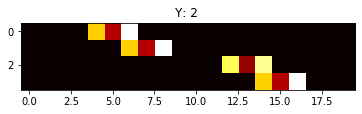

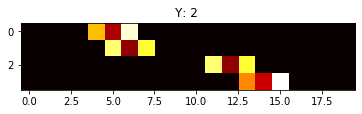

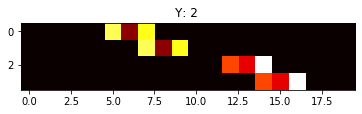

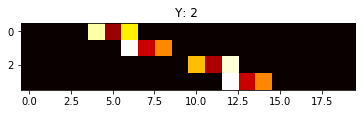

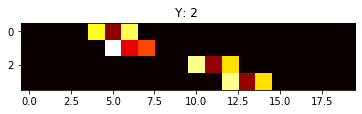

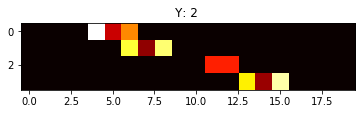

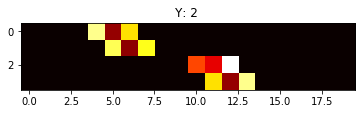

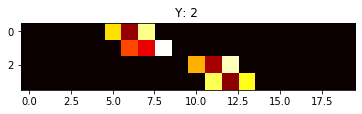

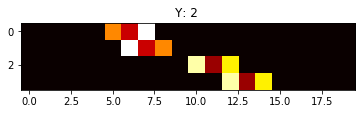

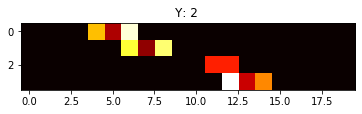

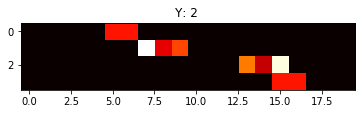

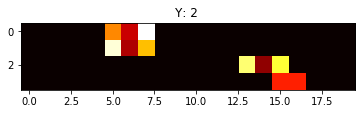

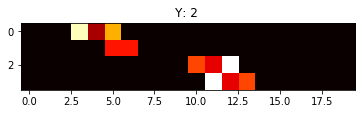

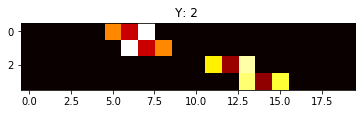

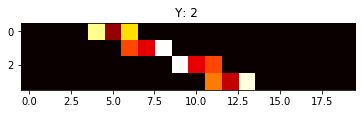

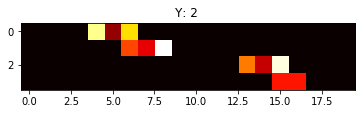

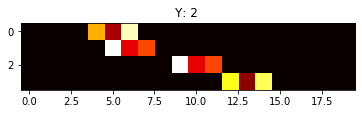

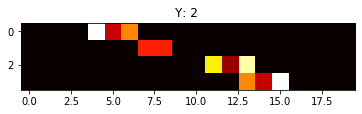

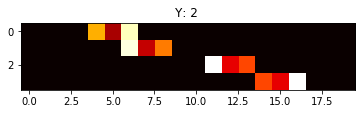

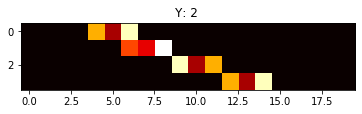

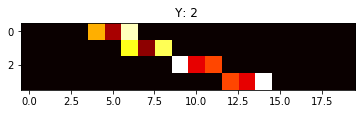

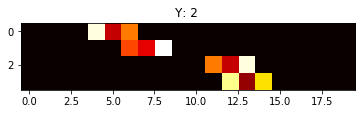

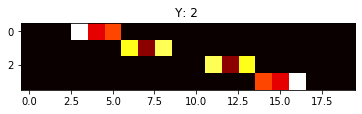

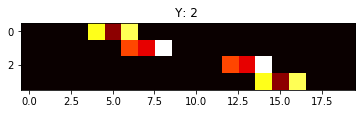

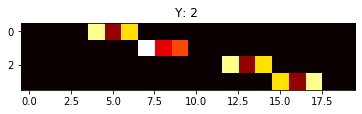

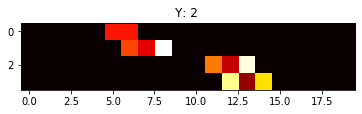

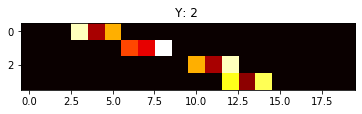

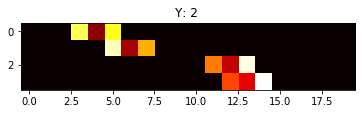

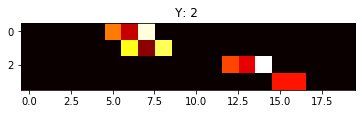

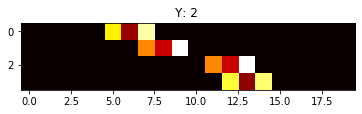

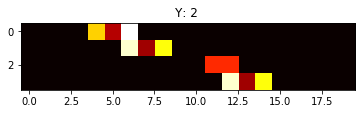

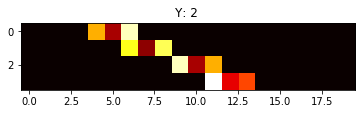

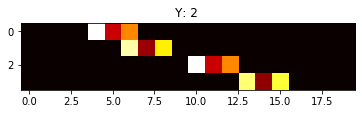

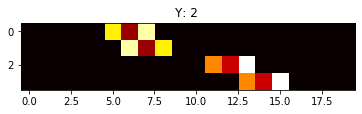

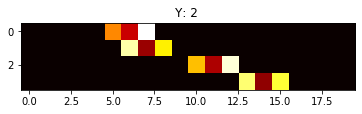

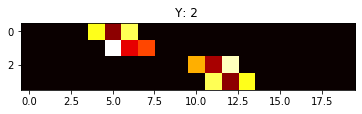

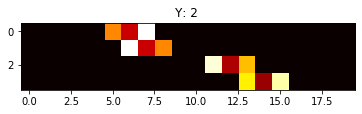

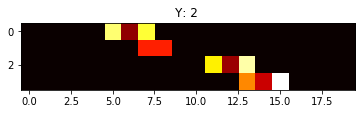

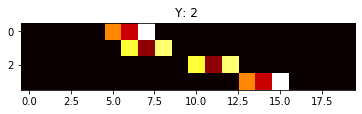

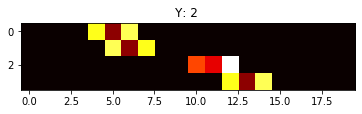

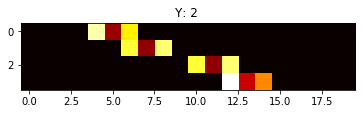

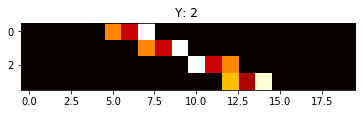

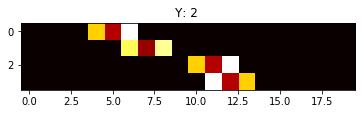

In [12]:
for i in range(len(X)):
    plt.imshow(spike_times[i], cmap='hot', interpolation='nearest')
    plt.title("Y: {} ".format(y[i]))
    plt.show()

## Part 2: Implementation

In [13]:
def gaussianRF(X, inp, n=20, T_ref=10):
    """
    @description:    
        Encoding input vector X via Gaussian Receptive Fields (GRFs)
    @arguments:
        X (array): dataset
        inp (array): input array for smooth GRFs
        n (int): number of neurons
        T_ref (int): Reference time for temporal encoding
    @returns:
        spike_times (array): array of spike times for all samples
    """
    # compute max and min of input
    inp_min = min(inp)
    inp_max = max(inp)
    # compute standard deviation
    sigma = (1/1.5) * (inp_max-inp_min)/(n-2)
    sigma = round(sigma, 2)
    # compute expectation
    mu = inp_min + ((np.arange(0, n, 1) - 1.5) * (inp_max - inp_min) / (n-2))
    # compute gaussian receptive fields
    grf = np.array([scipy.stats.norm(mu[i], sigma).pdf(inp) for i in range(n)])
    grf = preprocessing.normalize(grf, axis=0)
    # compute spike times for all instances of X
    spike_times = []
    for i in range(len(X)):
        # extract location of the elements of X[i] in inp array
        indices = np.where(np.in1d(inp, X[i]))[0]
        spike_times_ps = [] # spike times per sample
        for idx in indices:
            # compute spike times for all features (per sample)
            grf_values = [-T_ref*g[idx]+T_ref for g in grf]
            spike_times_ps.append([-1 if g>=T_ref-1 else g for g in grf_values])
        spike_times_ps = np.around(np.array(spike_times_ps), decimals=2)
        spike_times.append(spike_times_ps) # combine spike times of all samples
        
    spike_times = np.array(spike_times)
    return spike_times

In [14]:
def visualize_spikes(spike_times, label):
    plt.figure()
    plt.imshow(spike_times, cmap='hot', interpolation='nearest')
    plt.title("Label: {} ".format(label))
    plt.show()

Load Data and compute Spike Times for all samples

In [15]:
# load IRIS Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# normalizing X
X_norm = np.around(preprocessing.normalize(X, axis=1), decimals=2)

In [16]:
# input vector
inp = np.around(np.arange(0, 1, 0.01), decimals=2)

In [17]:
# compute spike times
spike_times = gaussianRF(X_norm, inp, n=20, T_ref=10)

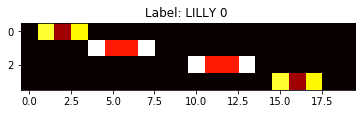

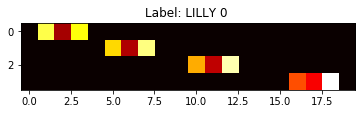

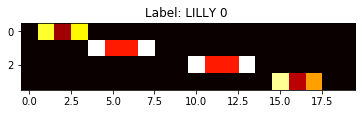

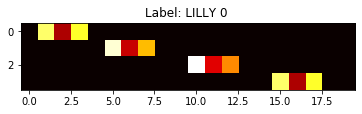

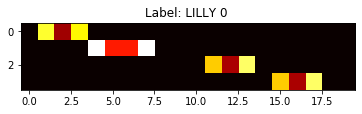

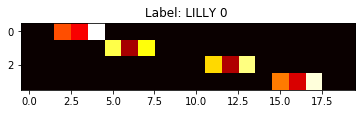

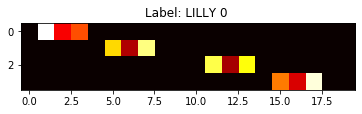

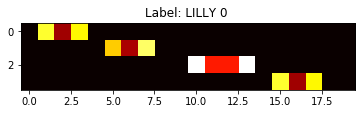

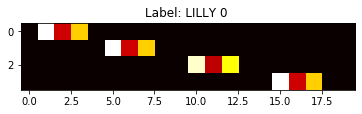

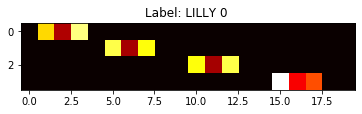

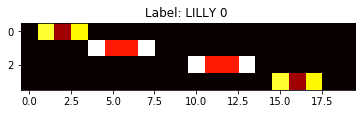

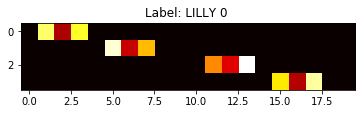

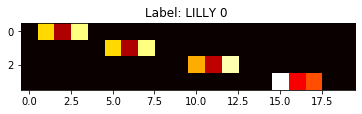

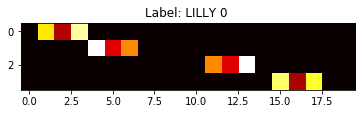

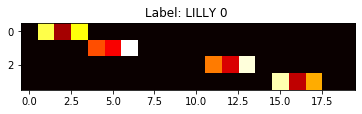

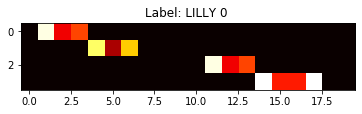

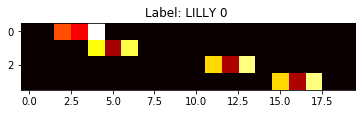

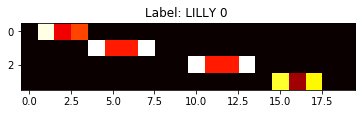

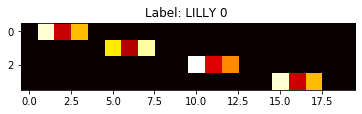

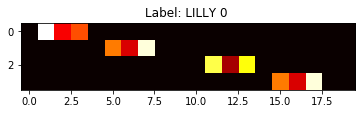

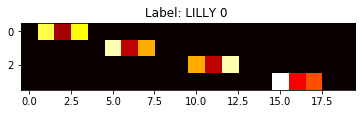

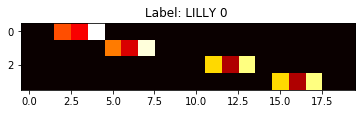

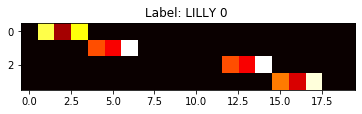

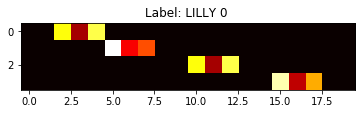

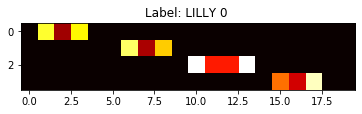

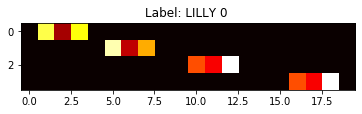

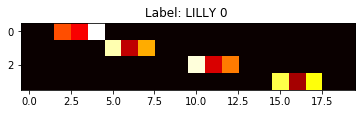

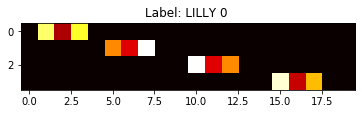

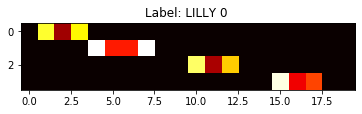

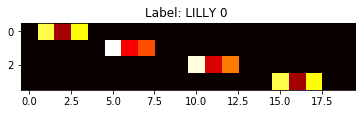

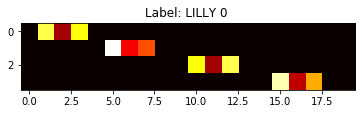

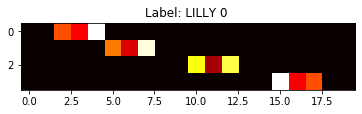

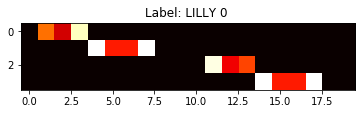

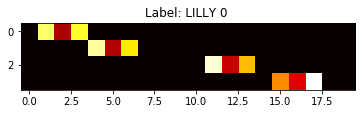

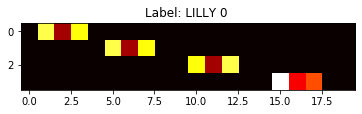

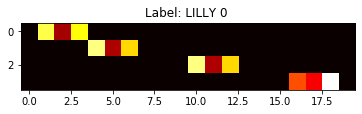

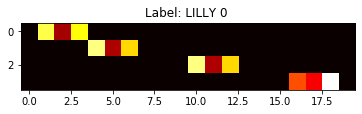

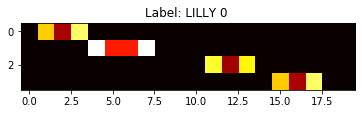

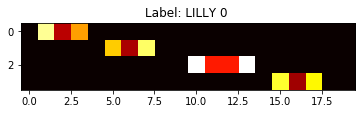

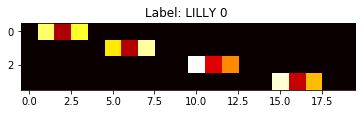

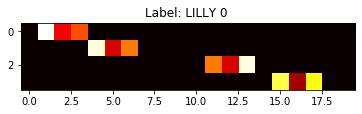

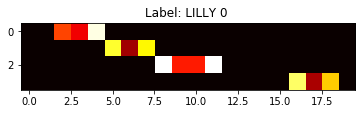

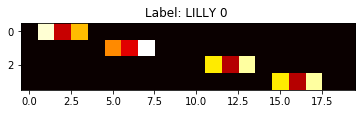

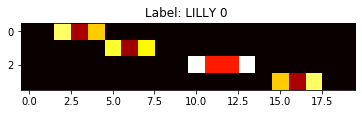

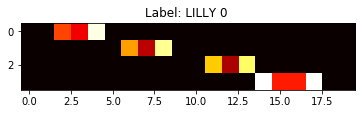

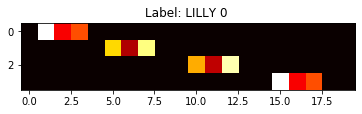

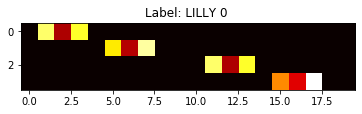

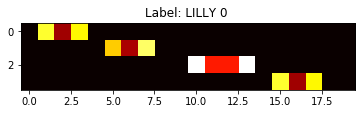

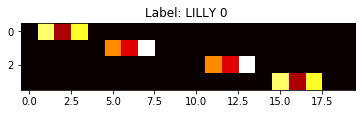

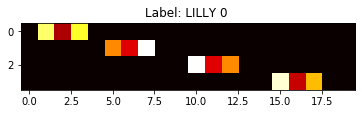

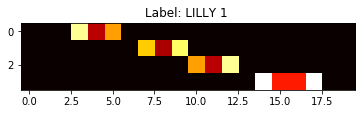

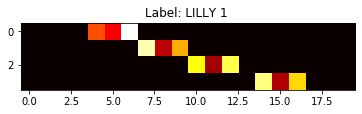

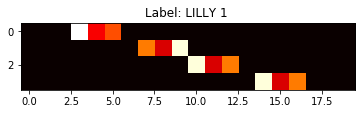

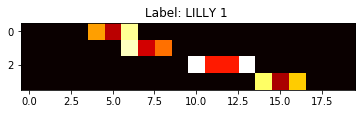

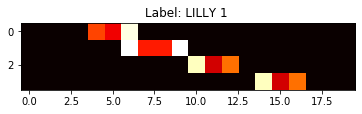

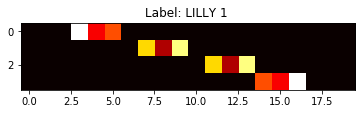

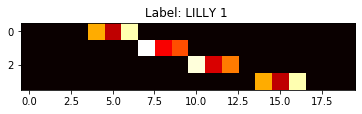

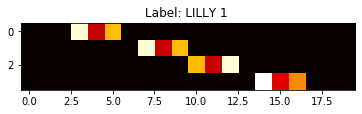

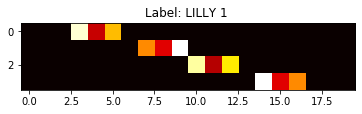

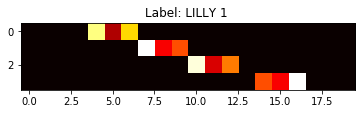

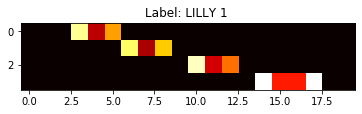

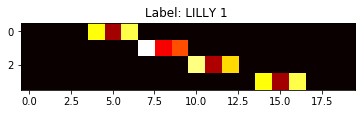

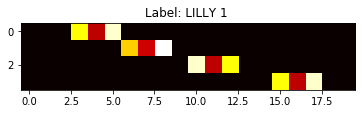

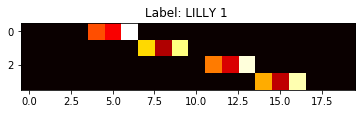

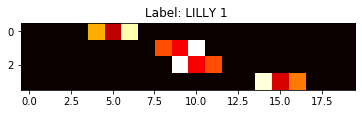

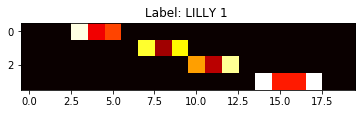

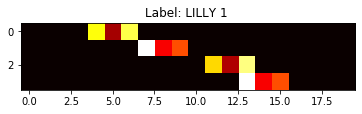

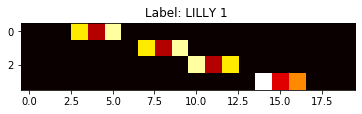

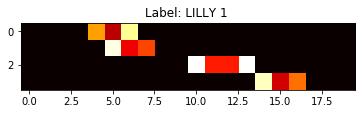

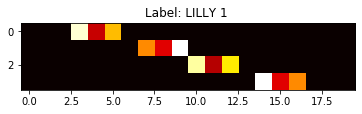

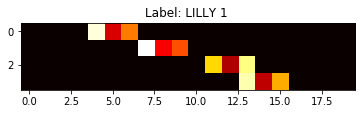

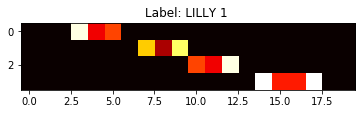

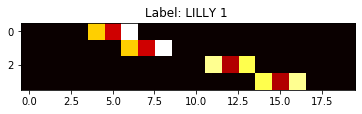

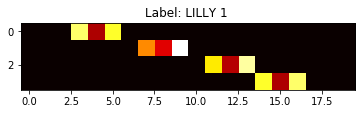

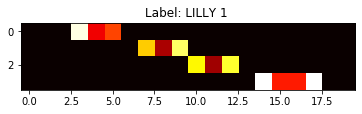

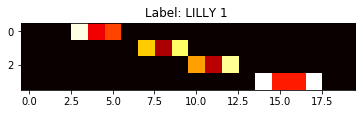

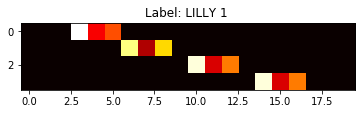

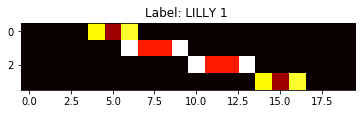

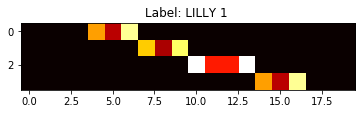

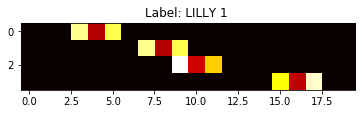

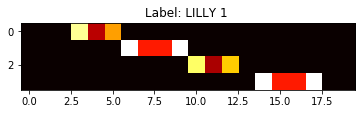

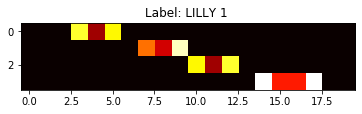

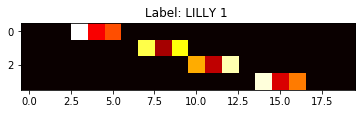

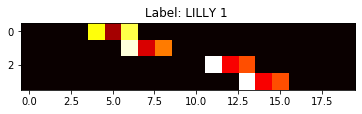

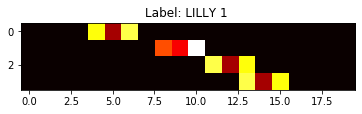

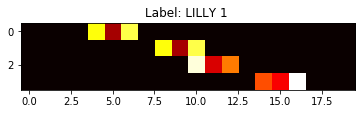

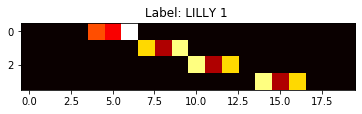

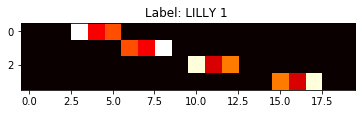

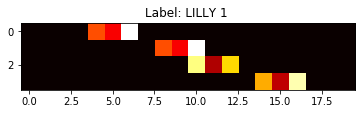

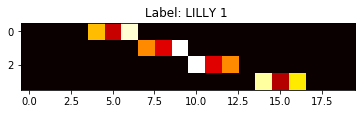

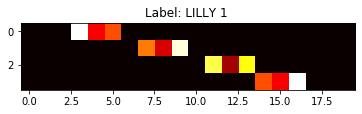

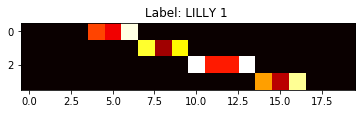

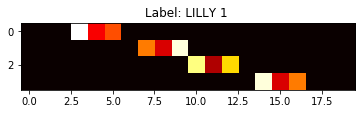

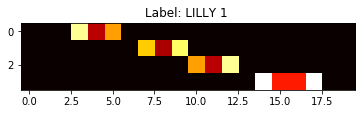

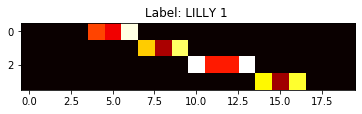

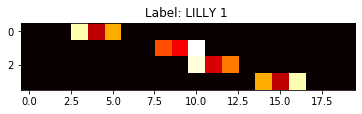

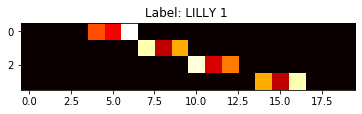

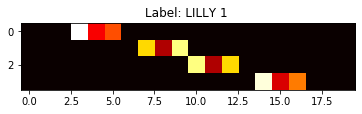

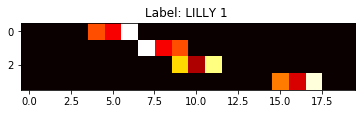

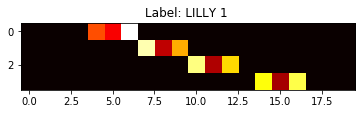

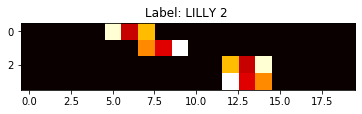

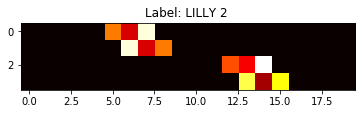

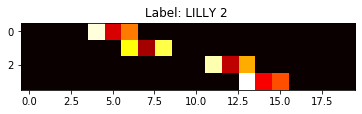

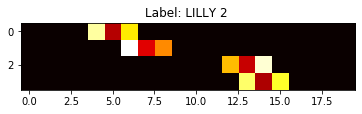

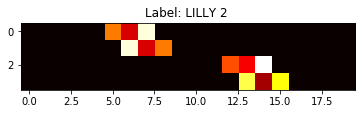

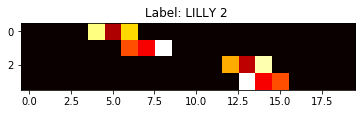

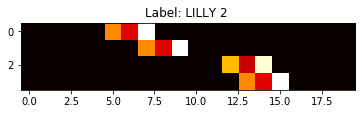

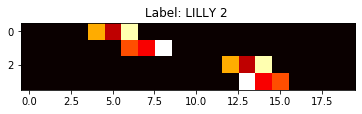

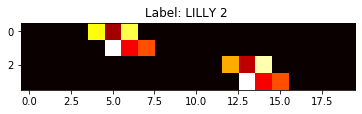

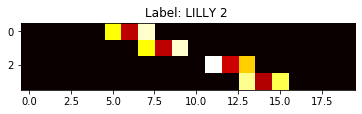

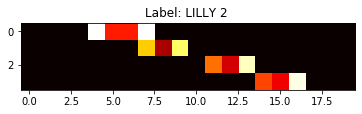

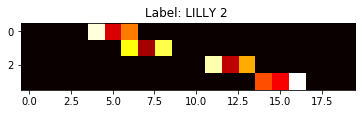

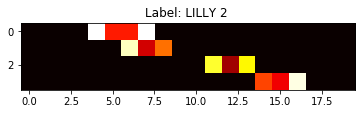

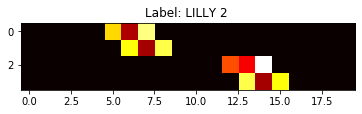

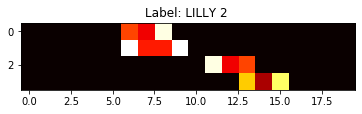

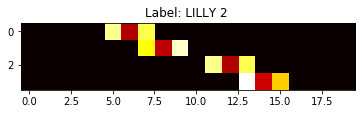

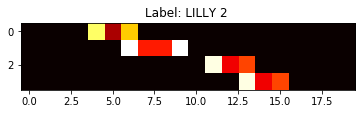

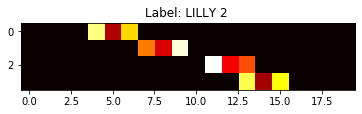

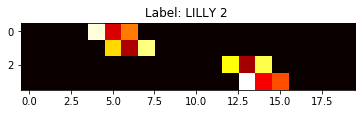

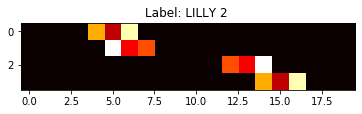

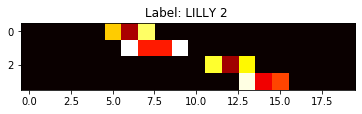

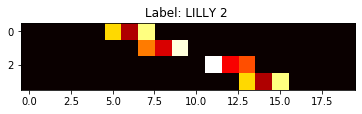

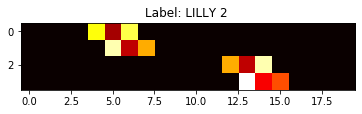

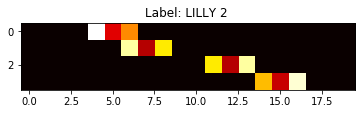

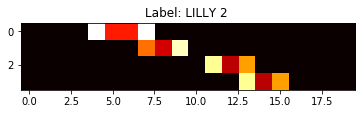

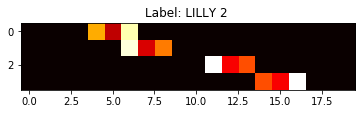

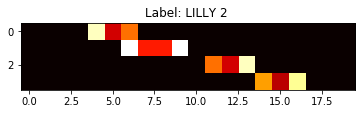

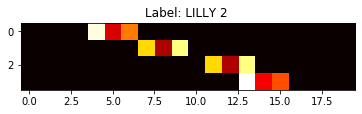

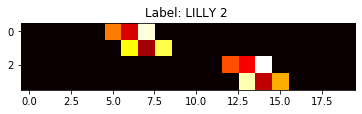

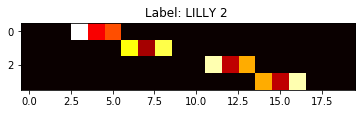

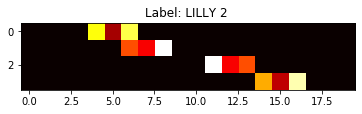

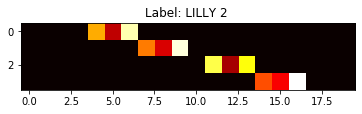

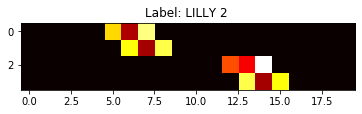

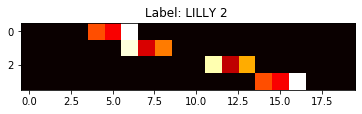

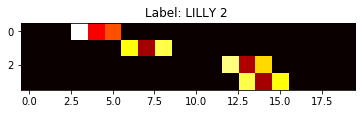

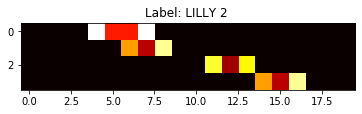

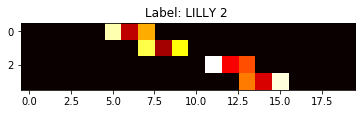

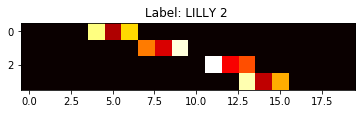

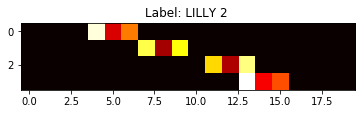

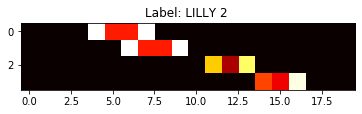

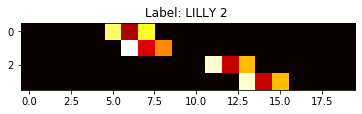

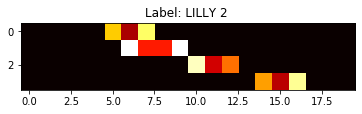

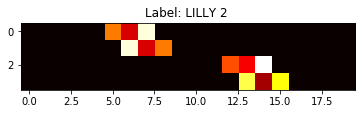

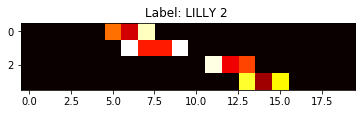

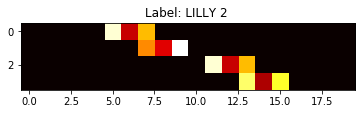

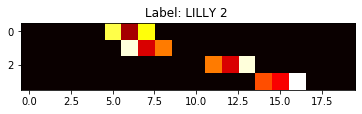

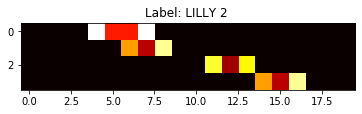

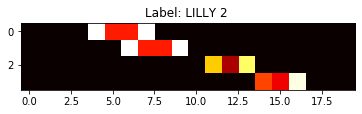

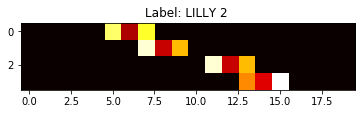

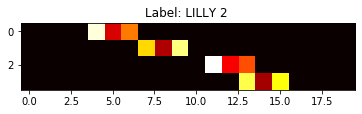

In [18]:
# visualize spike times
for t in range(spike_times.shape[0]):
    visualize_spikes(spike_times[t], 'LILLY {}'.format(y[t]))

**From here on we start implementing STDP via the BRIAN2 library to learn the patterns from the features of the lilly dataset**

First up we load in the brian2 library via PIP
and import other libraries we need

Fir

In [19]:
import sys
!{sys.executable} -m pip install brian2
#do all the imports
from brian2 import *
import numpy as np
import random

In [20]:
# Here we create a train set  34 unique smaples and 50 with repetitions to get the same size as the original,
# and test set  16 for each class
# TAKE VALIDATION EXAMPLES FROM THE DATASET
spike_times_test=np.copy(spike_times[0:16]),np.copy(spike_times[50:66]),np.copy(spike_times[100:116])
y_test=np.copy(y[0:16]),np.copy(y[50:66]),np.copy(y[100:116])
# REPREAT OTHER VALUES TO KEEP THE SAME SIZE 
spike_times[0:16]=spike_times[17:33]
spike_times[50:66]=spike_times[67:83]
spike_times[100:116]=spike_times[117:133]


Here we set the settings for how quikly the voltage in the neurons decay

In [21]:
taupre = taupost = 1*ms
wmax = 0.01
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05

n_neurons = 20
random.seed(9)

Here we take the spike_times, as they were defined before, and we concatinate them sothat for each of the 3 flowers, we have a continuous sequence of neurons that fire.
We get bot the spike_feature_i (The nth neuron to fire)
and the spike_feature_t (what time this neuron should fire)

In [22]:
spike_feature_i = [[],[],[]]
spike_feature_t = [[],[],[]]

n_instance = [0,0,0]
for i_instance,instance in enumerate(spike_times):
  flower = y[i_instance]
  
  for i_feature,feature in enumerate(instance):
    for i_val,val in enumerate(feature):
      if(val>0):
        spike_feature_i[flower].append(i_val+20*i_feature)
        spike_feature_t[flower].append(n_instance[flower]*20+i_val)
  n_instance[flower]+=1


print(spike_feature_i[0])
print(spike_feature_t[0])

print(spike_feature_i[1])
print(spike_feature_t[1])

print(spike_feature_i[2])
print(spike_feature_t[2])



[1, 2, 3, 24, 25, 26, 27, 50, 51, 52, 53, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 25, 26, 27, 51, 52, 53, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 2, 3, 4, 25, 26, 27, 51, 52, 53, 75, 76, 77, 1, 2, 3, 24, 25, 26, 52, 53, 54, 75, 76, 77, 2, 3, 4, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 26, 27, 28, 50, 51, 52, 53, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 76, 77, 78, 2, 3, 4, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 24, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 2, 3, 4, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 24, 25, 26, 27, 51, 52, 53, 74, 75, 76, 77, 2, 3, 4, 24, 25, 26, 51, 52, 53, 75, 76, 77, 1, 2, 3, 24, 25, 26, 27, 50, 51, 52, 53, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 1, 2, 3, 25, 26, 27, 51, 52, 53, 75, 76, 77, 1, 2, 3, 25, 26, 27, 50, 51, 52, 75, 76, 77, 2, 3, 4, 25, 26, 27, 5

Here we create 3 spike generator groups. Each one responsible for one feature
We aslo create 3 neuron groups. Each of them will be trained by one feature


In [23]:
Gf1 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[0],times=spike_feature_t[0]*ms)
Gf2 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[1],times=spike_feature_t[1]*ms)
Gf3 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[2],times=spike_feature_t[2]*ms)

Gpost_flower_1 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms)
Gpost_flower_2 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms)
Gpost_flower_3 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms)

Here we define the synapse between the pre and post (The 3*20 feature neurons from the BRF, and the 3 post neurons that shall learn the features)

In [24]:
S_flower_1 = Synapses(Gf1, Gpost_flower_1,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (clock-driven)
             dapost/dt = -apost/taupost : 1 (clock-driven)
             ''',
             on_pre='''
             v_post += w
             apre = Apre
             w = clip(w+apost, 1e-8, wmax)
             ''',
             on_post='''
             apost = Apost
             w = clip(w+apre, 1e-8, wmax)
             ''', method='linear')

S_flower_2 = Synapses(Gf2, Gpost_flower_2,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (clock-driven)
             dapost/dt = -apost/taupost : 1 (clock-driven)
             ''',
             on_pre='''
             v_post += w
             apre = Apre
             w = clip(w+apost, 1e-8, wmax)
             ''',
             on_post='''
             apost = Apost
             w = clip(w+apre, 1e-8, wmax)
             ''', method='linear')

S_flower_3 = Synapses(Gf3, Gpost_flower_3,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (clock-driven)
             dapost/dt = -apost/taupost : 1 (clock-driven)
             ''',
             on_pre='''
             v_post += w
             apre = Apre
             w = clip(w+apost, 1e-8, wmax)
             ''',
             on_post='''
             apost = Apost
             w = clip(w+apre, 1e-8, wmax)
             ''', method='linear')
S_flower_1.connect()
S_flower_2.connect()
S_flower_3.connect()

#setting the weights to an initial value
S_flower_1.w = np.add(S_flower_1.w,[wmax/20]*len(S_flower_1.w))
S_flower_2.w = np.add(S_flower_2.w,[wmax/20]*len(S_flower_2.w))
S_flower_3.w = np.add(S_flower_3.w,[wmax/20]*len(S_flower_3.w))

Create monitors so we can see whta happens

In [25]:
Monitor_1 = StateMonitor(S_flower_1, ['v','w', 'apre', 'apost'], record=True)
Monitor_2 = StateMonitor(S_flower_2, ['v','w', 'apre', 'apost'], record=True)
Monitor_3 = StateMonitor(S_flower_3, ['v','w', 'apre', 'apost'], record=True)



Run for 1second. This will run all instances. Since we concatinates all the spiketimes

In [26]:
run(1000*ms)

And here we plot everything that we monitored.
We have for each flower 3 plots. On the the pre and post trail voltages (by how much the wights should be changed). Then we have all the wights, and then we van the voltage inside the post neuron.

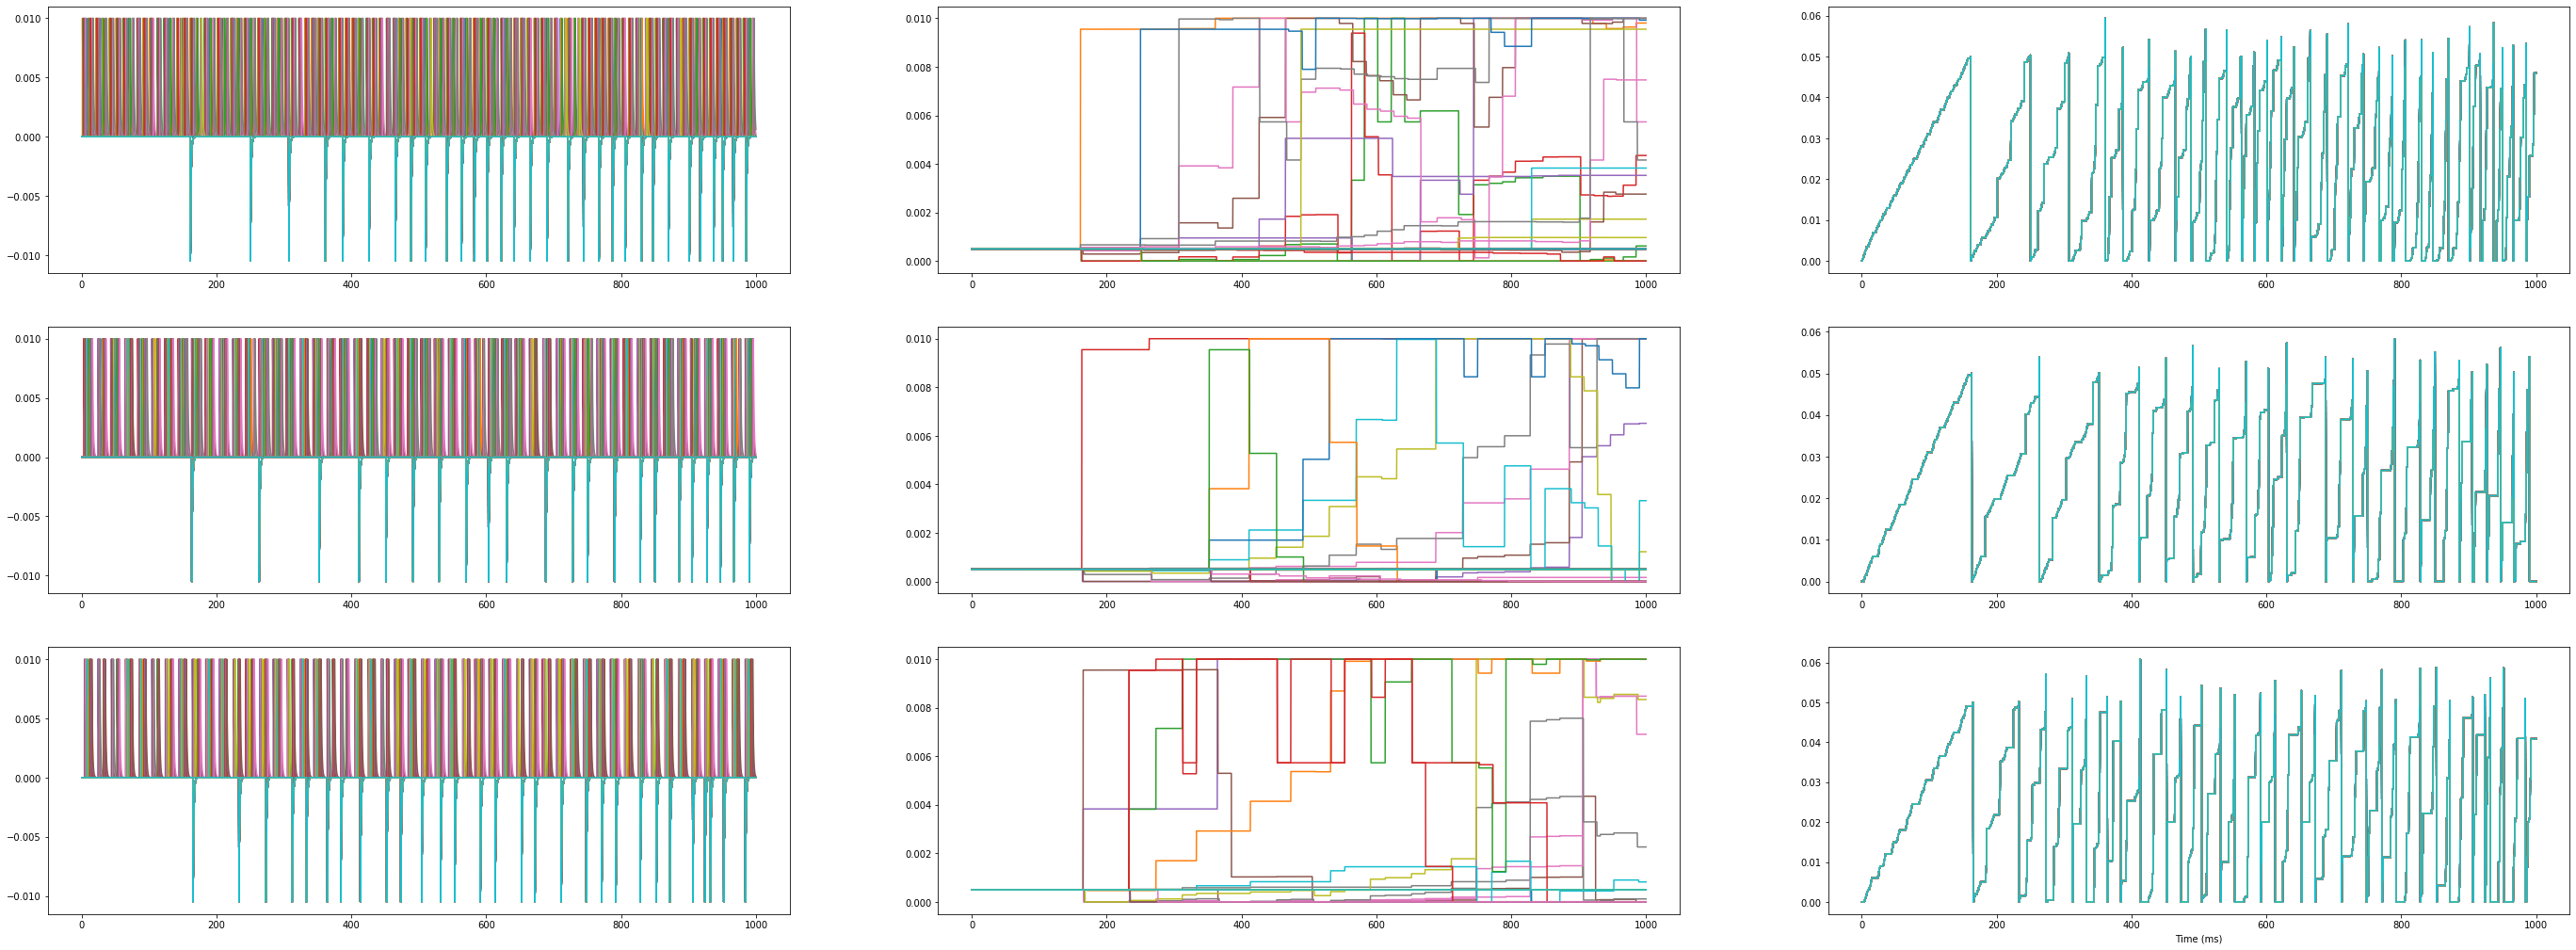

In [27]:
figure(figsize=(48, 24))
subplot(431)
for i,data in enumerate(Monitor_1.apre):
    plot(Monitor_1.t/ms, data, label='apre {}'.format(i))
for i, data in enumerate(Monitor_1.apost):
    plot(Monitor_1.t/ms, data, label='apost {}'.format(i))

subplot(434)
for i,data in enumerate(Monitor_2.apre):
    plot(Monitor_2.t/ms, data, label='apre {}'.format(i))
for i, data in enumerate(Monitor_2.apost):
    plot(Monitor_2.t/ms, data, label='apost {}'.format(i))

subplot(437)
for i,data in enumerate(Monitor_3.apre):
    plot(Monitor_3.t/ms, data, label='apre {}'.format(i))
for i, data in enumerate(Monitor_3.apost):
    plot(Monitor_3.t/ms, data, label='apost {}'.format(i))


subplot(432)
for i,data in enumerate(Monitor_1.w):
    plot(Monitor_1.t/ms, data, label='w1 {}'.format(i))


subplot(435)
for i,data in enumerate(Monitor_2.w):
    plot(Monitor_2.t/ms, data, label='w2 {}'.format(i))


subplot(438)
for i,data in enumerate(Monitor_3.w):
    plot(Monitor_3.t/ms, data, label='w3 {}'.format(i))



subplot(433)
for i,data in enumerate(Monitor_1.v):
    plot(Monitor_1.t/ms, data, label='v1 {}'.format(i))


subplot(436)
for i,data in enumerate(Monitor_2.v):
    plot(Monitor_2.t/ms, data, label='v2 {}'.format(i))


subplot(439)
for i,data in enumerate(Monitor_3.v):
    plot(Monitor_1.t/ms, data, label='v3 {}'.format(i))


xlabel('Time (ms)');

show()

**From here on we will build a test network**

With a restart scope, we throw away all the elements from the previous network, and start creating a new network.

In [28]:
start_scope()

For our test , we will create 9 networks.<br/>
We have 3 different input spiketrains (from the 3 flowers)<br/>
and we have 3 different weight matrices (that we trained before)<br/>

So we will create a network where we connect the flower 1 input spiketrain via the weight matrix 1 to an output neuron. <br/>

we will create a network where we connect the flower 1 input spiketrain via the weight matrix 2 to an output neuron. <br/>

we will create a network where we connect the flower 1 input spiketrain via the weight matrix 3 to an output neuron. <br/>

we will create a network where we connect the flower 2 input spiketrain via the weight matrix 1 to an output neuron. <br/>

etc etc etc.. till we have 9 networks

 <br/>

**BRIAN2 really does not like networks to be places in arrays** <br/>
Thus we have to declare many networks by hand in this codeblock


In [29]:
#EVERYTHING IS FROM --> TO [from][to] [pre][post] etc

tpre_1 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[0],times=spike_feature_t[0]*ms)
tpre_2 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[1],times=spike_feature_t[1]*ms)
tpre_3 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[2],times=spike_feature_t[2]*ms)

tpost1 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost2 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost3 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost4 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost5 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost6 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost7 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost8 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
tpost9 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 

Synapse_test_flower_11  = Synapses(tpre_1, tpost1,''' w : 1 \n n_f1 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f1+=1 \n disable_fire=1 ''', method='linear')
Synapse_test_flower_12  = Synapses(tpre_2, tpost2,''' w : 1 \n n_f2 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f2+=1 \n disable_fire=1 ''', method='linear')
Synapse_test_flower_13  = Synapses(tpre_3, tpost3,''' w : 1 \n n_f3 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f3+=1 \n disable_fire=1 ''', method='linear')

Synapse_test_flower_21  = Synapses(tpre_1, tpost4,''' w : 1 \n n_f1 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f1+=1 \n disable_fire=1 ''', method='linear')
Synapse_test_flower_22  = Synapses(tpre_2, tpost5,''' w : 1 \n n_f2 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f2+=1 \n disable_fire=1 ''', method='linear')
Synapse_test_flower_23  = Synapses(tpre_3, tpost6,''' w : 1 \n n_f3 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f3+=1 \n disable_fire=1 ''', method='linear')

Synapse_test_flower_31  = Synapses(tpre_1, tpost7,''' w : 1 \n n_f1 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f1+=1 \n disable_fire=1 ''', method='linear')
Synapse_test_flower_32  = Synapses(tpre_2, tpost8,''' w : 1 \n n_f2 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f2+=1 \n disable_fire=1 ''', method='linear')
Synapse_test_flower_33  = Synapses(tpre_3, tpost9,''' w : 1 \n n_f3 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f3+=1 \n disable_fire=1 ''', method='linear')

Synapse_test_flower_11.connect()
Synapse_test_flower_12.connect()
Synapse_test_flower_13.connect()

Synapse_test_flower_21.connect()
Synapse_test_flower_22.connect()
Synapse_test_flower_23.connect()

Synapse_test_flower_31.connect()
Synapse_test_flower_32.connect()
Synapse_test_flower_33.connect()



Here we set the weights of all the networks to the weights that we trained earlier

In [31]:
Synapse_test_flower_11.w = S_flower_1.w
Synapse_test_flower_12.w = S_flower_1.w
Synapse_test_flower_13.w = S_flower_1.w

Synapse_test_flower_21.w = S_flower_2.w
Synapse_test_flower_22.w = S_flower_2.w
Synapse_test_flower_23.w = S_flower_2.w

Synapse_test_flower_31.w = S_flower_3.w
Synapse_test_flower_32.w = S_flower_3.w
Synapse_test_flower_33.w = S_flower_3.w



We create some spike monitors to keep track of what neuron spiked,
and some variable monitors to keep track of the output neuron voltage

In [32]:
spikemon_11 = SpikeMonitor(tpost1)
spikemon_12 = SpikeMonitor(tpost2)
spikemon_13 = SpikeMonitor(tpost3)

spikemon_21 = SpikeMonitor(tpost4)
spikemon_22 = SpikeMonitor(tpost5)
spikemon_23 = SpikeMonitor(tpost6)

spikemon_31 = SpikeMonitor(tpost7)
spikemon_32 = SpikeMonitor(tpost8)
spikemon_33 = SpikeMonitor(tpost9)

Test_Monitor_11 = StateMonitor(Synapse_test_flower_11, ['v'], record=True)
Test_Monitor_12 = StateMonitor(Synapse_test_flower_12, ['v'], record=True)
Test_Monitor_13 = StateMonitor(Synapse_test_flower_13, ['v'], record=True)

Test_Monitor_21 = StateMonitor(Synapse_test_flower_21, ['v'], record=True)
Test_Monitor_22 = StateMonitor(Synapse_test_flower_22, ['v'], record=True)
Test_Monitor_23 = StateMonitor(Synapse_test_flower_23, ['v'], record=True)

Test_Monitor_31 = StateMonitor(Synapse_test_flower_31, ['v'], record=True)
Test_Monitor_32 = StateMonitor(Synapse_test_flower_32, ['v'], record=True)
Test_Monitor_33 = StateMonitor(Synapse_test_flower_33, ['v'], record=True)



We run the whole spiketrain, Every 20ms is one instance.
<br>
There are 50 instances,
<br>
we reset the post neuron voltage after each 20 ms.
<br>
Thus, during each period of 20 ms ,one instance is shown to the network

In [33]:
for i_run in range(50):
  print("[{} of 50".format(i_run),end = '') 
  run(20*ms)
  tpost1.v=0
  tpost2.v=0
  tpost3.v=0
  tpost4.v=0
  tpost5.v=0
  tpost6.v=0
  tpost7.v=0
  tpost8.v=0
  tpost9.v=0

  Synapse_test_flower_11.disable_fire=1
  Synapse_test_flower_12.disable_fire=1
  Synapse_test_flower_13.disable_fire=1
  Synapse_test_flower_21.disable_fire=1
  Synapse_test_flower_22.disable_fire=1
  Synapse_test_flower_23.disable_fire=1
  Synapse_test_flower_31.disable_fire=1
  Synapse_test_flower_32.disable_fire=1
  Synapse_test_flower_33.disable_fire=1

[0 of 50[1 of 50[2 of 50[3 of 50[4 of 50[5 of 50[6 of 50[7 of 50[8 of 50[9 of 50[10 of 50[11 of 50[12 of 50[13 of 50[14 of 50[15 of 50[16 of 50[17 of 50[18 of 50[19 of 50[20 of 50[21 of 50[22 of 50[23 of 50[24 of 50[25 of 50[26 of 50[27 of 50[28 of 50[29 of 50[30 of 50[31 of 50[32 of 50[33 of 50[34 of 50[35 of 50[36 of 50[37 of 50[38 of 50[39 of 50[40 of 50[41 of 50[42 of 50[43 of 50[44 of 50[45 of 50[46 of 50[47 of 50[48 of 50[49 of 50

Here we display how many we have correct
and we plot the spikes and the voltages of the output neurons

Testset 1 on feature extractor 1 yields 46.0/50 classifications of flower 1
Testset 1 on feature extractor 2 yields 15.0/50 classifications of flower 2
Testset 1 on feature extractor 3 yields 0.0/50 classifications of flower 3
Testset 2 on feature extractor 1 yields 0.0/50 classifications of flower 1
Testset 2 on feature extractor 2 yields 31.0/50 classifications of flower 2
Testset 2 on feature extractor 3 yields 0.0/50 classifications of flower 3
Testset 3 on feature extractor 1 yields 1.0/50 classifications of flower 1
Testset 3 on feature extractor 2 yields 8.0/50 classifications of flower 2
Testset 3 on feature extractor 3 yields 14.0/50 classifications of flower 3


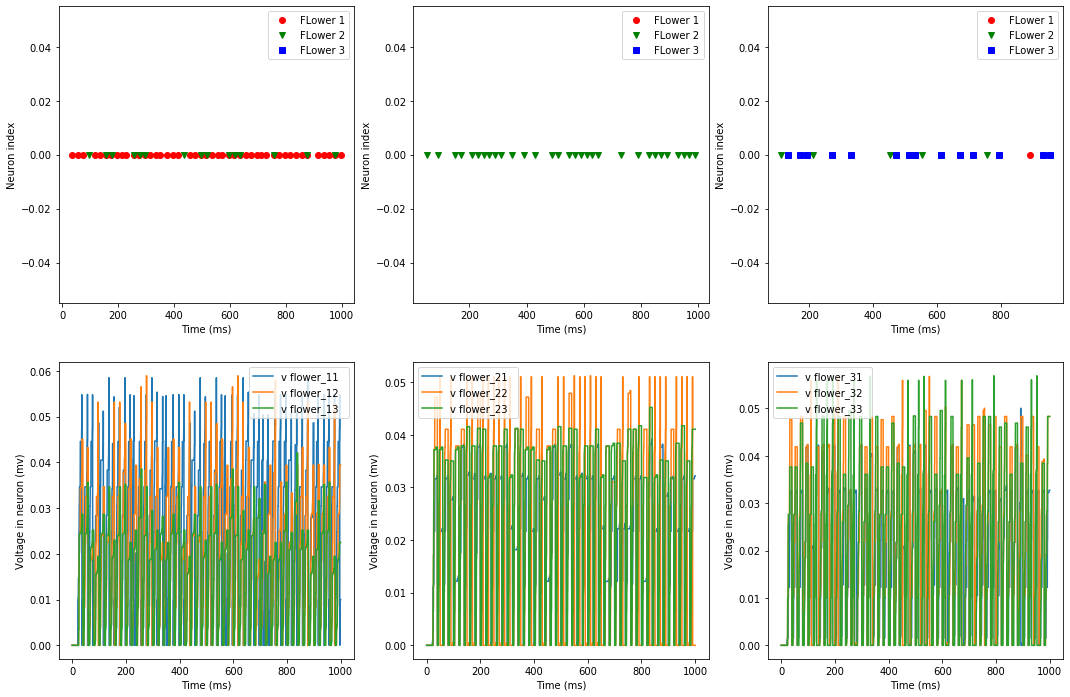

In [34]:

print("Testset 1 on feature extractor 1 yields {}/50 classifications of flower 1".format(Synapse_test_flower_11.n_f1[0]))
print("Testset 1 on feature extractor 2 yields {}/50 classifications of flower 2".format(Synapse_test_flower_12.n_f2[0]))
print("Testset 1 on feature extractor 3 yields {}/50 classifications of flower 3".format(Synapse_test_flower_13.n_f3[0]))

print("Testset 2 on feature extractor 1 yields {}/50 classifications of flower 1".format(Synapse_test_flower_21.n_f1[0]))
print("Testset 2 on feature extractor 2 yields {}/50 classifications of flower 2".format(Synapse_test_flower_22.n_f2[0]))
print("Testset 2 on feature extractor 3 yields {}/50 classifications of flower 3".format(Synapse_test_flower_23.n_f3[0]))

print("Testset 3 on feature extractor 1 yields {}/50 classifications of flower 1".format(Synapse_test_flower_31.n_f1[0]))
print("Testset 3 on feature extractor 2 yields {}/50 classifications of flower 2".format(Synapse_test_flower_32.n_f2[0]))
print("Testset 3 on feature extractor 3 yields {}/50 classifications of flower 3".format(Synapse_test_flower_33.n_f3[0]))


figure(figsize=(18, 12))
subplot(231)
plot(spikemon_11.t/ms, spikemon_11.i, 'or',label='FLower 1')
plot(spikemon_12.t/ms, spikemon_12.i, 'vg',label='FLower 2')
plot(spikemon_13.t/ms, spikemon_13.i, 'sb',label='FLower 3')
legend(loc = 'best')
xlabel('Time (ms)')
ylabel('Neuron index');

subplot(232)
plot(spikemon_21.t/ms, spikemon_21.i, 'or',label='FLower 1')
plot(spikemon_22.t/ms, spikemon_22.i, 'vg',label='FLower 2')
plot(spikemon_23.t/ms, spikemon_23.i, 'sb',label='FLower 3')
legend(loc = 'best')
xlabel('Time (ms)')
ylabel('Neuron index');

subplot(233)
plot(spikemon_31.t/ms, spikemon_31.i, 'or',label='FLower 1')
plot(spikemon_32.t/ms, spikemon_32.i, 'vg',label='FLower 2')
plot(spikemon_33.t/ms, spikemon_33.i, 'sb',label='FLower 3')
legend(loc = 'best')
xlabel('Time (ms)')
ylabel('Neuron index');

subplot(234)
plot(Test_Monitor_11.t/ms, Test_Monitor_11.v[0], label='v flower_11 {}'.format(' '))
plot(Test_Monitor_12.t/ms, Test_Monitor_12.v[0], label='v flower_12 {}'.format(' '))
plot(Test_Monitor_13.t/ms, Test_Monitor_13.v[0], label='v flower_13 {}'.format(' '))

legend(loc = 'best')
xlabel('Time (ms)');
ylabel('Voltage in neuron (mv)');

subplot(235)
plot(Test_Monitor_21.t/ms, Test_Monitor_21.v[0], label='v flower_21 {}'.format(' '))
plot(Test_Monitor_22.t/ms, Test_Monitor_22.v[0], label='v flower_22 {}'.format(' '))
plot(Test_Monitor_23.t/ms, Test_Monitor_23.v[0], label='v flower_23 {}'.format(' '))

legend(loc = 'best')
xlabel('Time (ms)');
ylabel('Voltage in neuron (mv)');

subplot(236)
plot(Test_Monitor_31.t/ms, Test_Monitor_31.v[0], label='v flower_31 {}'.format(' '))
plot(Test_Monitor_32.t/ms, Test_Monitor_32.v[0], label='v flower_32 {}'.format(' '))
plot(Test_Monitor_33.t/ms, Test_Monitor_33.v[0], label='v flower_33 {}'.format(' '))
 
legend(loc = 'best')
xlabel('Time (ms)');
ylabel('Voltage in neuron (mv)');

show()

# We create a classifier to test on useen data 

In [29]:
#EVERYTHING IS FROM --> TO [from][to] [pre][post] etc
def classifier(n):
    
    spike_times
    
    spike_feature_i = [i for i in range(80)] 
    spike_feature_t = np.concatenate((spike_times[n][0],spike_times[n][1],spike_times[n][2],spike_times[n][3]))

    spike_feature_t = np.where(spike_feature_t==-1,100, spike_feature_t)
    #print(spike_times[n],y[n])
    #print(spike_feature_i)
    #print(spike_feature_t)


#     spike_feature_i = [[],[],[]]
#     spike_feature_t = [[],[],[]]

#     n_instance = [0,0,0]
#     for i_instance,instance in enumerate(spike_times):
#       flower = y[i_instance]

#       for i_feature,feature in enumerate(instance):
#         for i_val,val in enumerate(feature):
#           if(val>0):
#             spike_feature_i[flower].append(i_val+20*i_feature)
#             spike_feature_t[flower].append(n_instance[flower]*20+i_val)
#       n_instance[flower]+=1
#     print(spike_feature_t)


    tpre_1 = SpikeGeneratorGroup(N=80,indices=spike_feature_i,times=spike_feature_t*ms)
    tpre_2 = SpikeGeneratorGroup(N=80,indices=spike_feature_i,times=spike_feature_t*ms)
    tpre_3 = SpikeGeneratorGroup(N=80,indices=spike_feature_i,times=spike_feature_t*ms)

#     tpre_2 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[0],times=spike_feature_t[0]*ms)
#     tpre_3 = SpikeGeneratorGroup(N=80,indices=spike_feature_i[0],times=spike_feature_t[0]*ms)

    tpost1 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
    tpost2 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
    tpost3 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
#     tpost4 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
#     tpost5 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
#     tpost6 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
#     tpost7 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
#     tpost8 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
#     tpost9 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 

    Synapse_test_flower_11  = Synapses(tpre_1, tpost1,''' w : 1 \n n_f1 : 1 ''', on_pre=''' v_post += (w) ''',on_post=''' n_f1+=1 \n ''', method='linear')
    Synapse_test_flower_12  = Synapses(tpre_2, tpost2,''' w : 1 \n n_f2 : 1 ''', on_pre=''' v_post += (w) ''',on_post=''' n_f2+=1 \n ''', method='linear')
    Synapse_test_flower_13  = Synapses(tpre_3, tpost3,''' w : 1 \n n_f3 : 1 ''', on_pre=''' v_post += (w) ''',on_post=''' n_f3+=1 \n ''', method='linear')

#     Synapse_test_flower_21  = Synapses(tpre_1, tpost4,''' w : 1 \n n_f1 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f1+=1 \n disable_fire=1 ''', method='linear')
#     Synapse_test_flower_22  = Synapses(tpre_2, tpost5,''' w : 1 \n n_f2 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f2+=1 \n disable_fire=1 ''', method='linear')
#     Synapse_test_flower_23  = Synapses(tpre_3, tpost6,''' w : 1 \n n_f3 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f3+=1 \n disable_fire=1 ''', method='linear')

#     Synapse_test_flower_31  = Synapses(tpre_1, tpost7,''' w : 1 \n n_f1 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f1+=1 \n disable_fire=1 ''', method='linear')
#     Synapse_test_flower_32  = Synapses(tpre_2, tpost8,''' w : 1 \n n_f2 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f2+=1 \n disable_fire=1 ''', method='linear')
#     Synapse_test_flower_33  = Synapses(tpre_3, tpost9,''' w : 1 \n n_f3 : 1 \n disable_fire : 1 ''', on_pre=''' v_post += (w*disable_fire) ''',on_post=''' n_f3+=1 \n disable_fire=1 ''', method='linear')

    Synapse_test_flower_11.connect()
    Synapse_test_flower_12.connect()
    Synapse_test_flower_13.connect()

#     Synapse_test_flower_21.connect()
#     Synapse_test_flower_22.connect()
#     Synapse_test_flower_23.connect()

#     Synapse_test_flower_31.connect()
#     Synapse_test_flower_32.connect()
#     Synapse_test_flower_33.connect()

    Synapse_test_flower_11.w = S_flower_1.w
    Synapse_test_flower_12.w = S_flower_1.w
    Synapse_test_flower_13.w = S_flower_1.w

#     Synapse_test_flower_21.w = S_flower_2.w
#     Synapse_test_flower_22.w = S_flower_2.w
#     Synapse_test_flower_23.w = S_flower_2.w

#     Synapse_test_flower_31.w = S_flower_3.w
#     Synapse_test_flower_32.w = S_flower_3.w
#     Synapse_test_flower_33.w = S_flower_3.w
    spikemon_11 = SpikeMonitor(tpost1)
    spikemon_12 = SpikeMonitor(tpost2)
    spikemon_13 = SpikeMonitor(tpost3)

#     spikemon_21 = SpikeMonitor(tpost4)
#     spikemon_22 = SpikeMonitor(tpost5)
#     spikemon_23 = SpikeMonitor(tpost6)

#     spikemon_31 = SpikeMonitor(tpost7)
#     spikemon_32 = SpikeMonitor(tpost8)
#     spikemon_33 = SpikeMonitor(tpost9)

    Test_Monitor_11 = StateMonitor(Synapse_test_flower_11, ['v'], record=True)
    Test_Monitor_12 = StateMonitor(Synapse_test_flower_12, ['v'], record=True)
    Test_Monitor_13 = StateMonitor(Synapse_test_flower_13, ['v'], record=True)

#     Test_Monitor_21 = StateMonitor(Synapse_test_flower_21, ['v'], record=True)
#     Test_Monitor_22 = StateMonitor(Synapse_test_flower_22, ['v'], record=True)
#     Test_Monitor_23 = StateMonitor(Synapse_test_flower_23, ['v'], record=True)

#     Test_Monitor_31 = StateMonitor(Synapse_test_flower_31, ['v'], record=True)
#     Test_Monitor_32 = StateMonitor(Synapse_test_flower_32, ['v'], record=True)
#     Test_Monitor_33 = StateMonitor(Synapse_test_flower_33, ['v'], record=True)
    for i_run in range(1):
      print("[{} of 50".format(i_run),end = '') 

      run(20*ms)
      tpost1.v=0
      tpost2.v=0
      tpost3.v=0

    print(spikemon_11.t,spikemon_12.t,spikemon_13.t)
    a=np.argmin([i if i.shape[0]>0 else 100 for i in np.array([spikemon_11.t/ms,spikemon_12.t/ms,spikemon_13.t/ms])])
#     b=np.argmin([i if i.shape[0]>0 else 100 for i in np.array([spikemon_21.t/ms,spikemon_22.t/ms,spikemon_23.t/ms])])
#     c=np.argmin([i if i.shape[0]>0 else 100 for i in np.array([spikemon_31.t/ms,spikemon_32.t/ms,spikemon_33.t/ms])])
    print(Synapse_test_flower_11.v)
    return a
    

# How much accuracy can we get from this data encoding
To see that the test and train sets work we can measure the accuracy of other model on this same data

In [30]:
import random
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Test data 
test_spikes = np.concatenate((spike_times_test[0],spike_times_test[1],spike_times_test[2]))
# Test label
test_y = np.concatenate((y_test[0],y_test[1],y_test[2]))

c = list(zip(test_spikes, test_y))
 
random.shuffle(c)  # Shuffle the data to get a random order of test samples 

test_X, test_Y= zip(*c)    # This is the test set   <---------------------------------------- 

flat_test_X=[np.concatenate((test_X[i][0],test_X[i][1],test_X[i][2],test_X[i][3])) for i in range(len(test_X))]
# To compare we try with an MLP classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
# Get the spikes in to a flat vector f_spike
f_spike=[np.concatenate((spike_times[i][0],spike_times[i][1],spike_times[i][2],spike_times[i][3])) for i in range(150)]
# Train it 
clf.fit(f_spike,y)        # This is the train set   <----------------------------------------

# And with this encoding and partition of the data we get 93% accuracy 
accuracy_score(test_Y, clf.predict(flat_test_X))

0.9375

In [31]:

def classifier2(spike_feature_t):
    spike_feature_i = [i for i in range(80)] 
    spike_feature_t = np.where(spike_feature_t==-1,100, spike_feature_t)
    
    tpre_1 = SpikeGeneratorGroup(N=80,indices=spike_feature_i,times=spike_feature_t*ms)
    tpre_2 = SpikeGeneratorGroup(N=80,indices=spike_feature_i,times=spike_feature_t*ms)
    tpre_3 = SpikeGeneratorGroup(N=80,indices=spike_feature_i,times=spike_feature_t*ms)
    
    tpost1 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
    tpost2 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms) 
    tpost3 = NeuronGroup(1, 'v:1', threshold='v>0.05',reset = 'v=0', refractory=1*ms)
    
    Synapse_test_flower_11  = Synapses(tpre_1, tpost1,''' w : 1 \n n_f1 : 1 ''', on_pre=''' v_post += (w) ''',on_post=''' n_f1+=1 \n ''', method='linear')
    Synapse_test_flower_12  = Synapses(tpre_2, tpost2,''' w : 1 \n n_f2 : 1 ''', on_pre=''' v_post += (w) ''',on_post=''' n_f2+=1 \n ''', method='linear')
    Synapse_test_flower_13  = Synapses(tpre_3, tpost3,''' w : 1 \n n_f3 : 1 ''', on_pre=''' v_post += (w) ''',on_post=''' n_f3+=1 \n ''', method='linear')

    Synapse_test_flower_11.connect()
    Synapse_test_flower_12.connect()
    Synapse_test_flower_13.connect()
    
    Synapse_test_flower_11.w = S_flower_1.w
    Synapse_test_flower_12.w = S_flower_1.w
    Synapse_test_flower_13.w = S_flower_1.w
    
    spikemon_11 = SpikeMonitor(tpost1)
    spikemon_12 = SpikeMonitor(tpost2)
    spikemon_13 = SpikeMonitor(tpost3)
    
    Test_Monitor_11 = StateMonitor(Synapse_test_flower_11, ['v'], record=True)
    Test_Monitor_12 = StateMonitor(Synapse_test_flower_12, ['v'], record=True)
    Test_Monitor_13 = StateMonitor(Synapse_test_flower_13, ['v'], record=True)
    run(40*ms)
    tpost1.v=0
    tpost2.v=0
    tpost3.v=0
    print(spikemon_11.t,spikemon_12.t,spikemon_13.t,Test_Monitor_13.v)

In [32]:
classifier2(flat_test_X[0])

<spikemonitor.t: array([], dtype=float64) * second> <spikemonitor_1.t: array([], dtype=float64) * second> <spikemonitor_2.t: array([], dtype=float64) * second> [[0.         0.         0.         ... 0.02772164 0.02772164 0.02772164]
 [0.         0.         0.         ... 0.02772164 0.02772164 0.02772164]
 [0.         0.         0.         ... 0.02772164 0.02772164 0.02772164]
 ...
 [0.         0.         0.         ... 0.02772164 0.02772164 0.02772164]
 [0.         0.         0.         ... 0.02772164 0.02772164 0.02772164]
 [0.         0.         0.         ... 0.02772164 0.02772164 0.02772164]]
